In [2]:
# Load the CourseKata library
suppressPackageStartupMessages({
    library(coursekata)
})
#Andrew Medeiros
#December 13, 2022

In [3]:
Overframe <- read.csv("Overbuff_scraped_24-05-2020.csv")

In [3]:
str(Overframe)

'data.frame':	768 obs. of  10 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Hero     : chr  "Reinhardt" "Ana" "Moira" "Zarya" ...
 $ Role     : chr  "TANK" "SUPPORT" "SUPPORT" "TANK" ...
 $ Pick_rate: num  12.08 10.8 8.28 7.51 6.56 ...
 $ Win_rate : num  52.1 49.9 50 52.9 51.3 ...
 $ Tie_Rate : num  2.61 2.36 2.45 2.47 2.42 1.79 2.06 2.2 1.75 2.22 ...
 $ On_fire  : num  7.15 9.81 10.52 12.39 2.46 ...
 $ Rank     : chr  "All" "All" "All" "All" ...
 $ Date     : chr  "2020-05-24 11:54:16.967151" "2020-05-24 11:54:16.967151" "2020-05-24 11:54:16.967151" "2020-05-24 11:54:16.967151" ...
 $ Platform : chr  "PC" "PC" "PC" "PC" ...


In [10]:
head(Overframe)

,X,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Rank,Date,Platform
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,0,Reinhardt,TANK,12.08,52.10,2.61,7.15,All,2020-05-24 11:54:16.967151,PC
2,1,Ana,SUPPORT,10.80,49.92,2.36,9.81,All,2020-05-24 11:54:16.967151,PC
3,2,Moira,SUPPORT,8.28,49.95,2.45,10.52,All,2020-05-24 11:54:16.967151,PC
4,3,Zarya,TANK,7.51,52.90,2.47,12.39,All,2020-05-24 11:54:16.967151,PC
5,4,Mercy,SUPPORT,6.56,51.32,2.42,2.46,All,2020-05-24 11:54:16.967151,PC
6,5,McCree,OFFENSE,4.72,47.43,1.79,8.60,All,2020-05-24 11:54:16.967151,PC


# 1.0 - Intro/ Overview of the Problem or Question

Overwatch is a competitive, hero-based fps game created by Blizzard Entertainment. It is one of the most popular games in the world, garnering multiple Game Of The Year awards and having a very successful international competitive league. Thousands of people log in everyday to play, and I am one of them. 2 teams of 6 players fight to see who is the best, and the more you win, the higher you progress in the game’s competitive ranks. The thrill of Overwatch comes from the fact that not everyone plays the same character, like in Halo or Call of Duty. Each player is a unique hero with their own diverse personality and set of abilities. Only in Overwatch can a match where a talking gorilla from outer space and a post-apocalyptic terrorist fight off against a ninja cyborg and professional runner that can travel through time.

With so many unique and interesting heroes to play, it can be hard to predict which heroes players are more likely to play. Which is what I set out to do in this report. The data set I will be investigating in this report comes from the website Overbuff.com, a database site that tracks the data of individuals’ competitive matches, as well as overall trends across all competitive games in a season. The data set was created on May 24, 2020, contains all competitive game data since the games exactly 4 years ago on May 24, 2016.  There are 768 observations, split into 3 platform categories based on platform: PS, XBOX, and PC, which are also split into 8 categories: All, Bronze, Silver, Gold, Platinum, Diamond, Master, and Grandmaster. These are the competitive ranks one can achieve. The 32 remaining observations in each of the competitive ranks are the 32 most popular heroes of that given rank. 

Their popularity is determined by their *Pick_rate*, which is the average proportion of players a character makes up in a single match of Overwatch across all matches. For example, the highest pick rate a hero can possibly achieve is 16.67%. That means that a hero was selected by a player on both teams 100% of time, making their average proportion of players in a match 2/12, or 0.1667. There are are other variables as well, such a *Win_rate*: the percentage of games that hero has won, *tie_rate*: the percentage of games that hero has tied in, and *on_fire_rate*: the percentage of games that hero was on fire, an in-game event in which a player has scored a lot of points in a short amount of time.

I will be investigating if there is a causal link between a hero’s Win_rate and their Pick_rate. More specifically, I will investigate whether or not a hero’s chances of winning affect its chances of being picked. I hypothesize that a higher Win_rate leads to a higher Pick_rate, since players will want to play heroes that are more likely to win than heroes that are not. The word equation for this hypothesis will be *Pick_rate = Win_rate + other stuff.*

# 2.0 - Exploring Variation

To start off, we must first explore the variations within our variables. First we will look at the explanatory variable *Win_rate*. Below is a histogram of the *Win_rates* of all 768 heroes in the set. It appears that all heroes have a *Win_rate* between 35.21% and 70%. Half appear to have a win rate between 48.16% and 53.6%, with the average being 50.86%. 

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,35.21,48.16,50.66,53.6,70,50.85977,4.143294,768,0


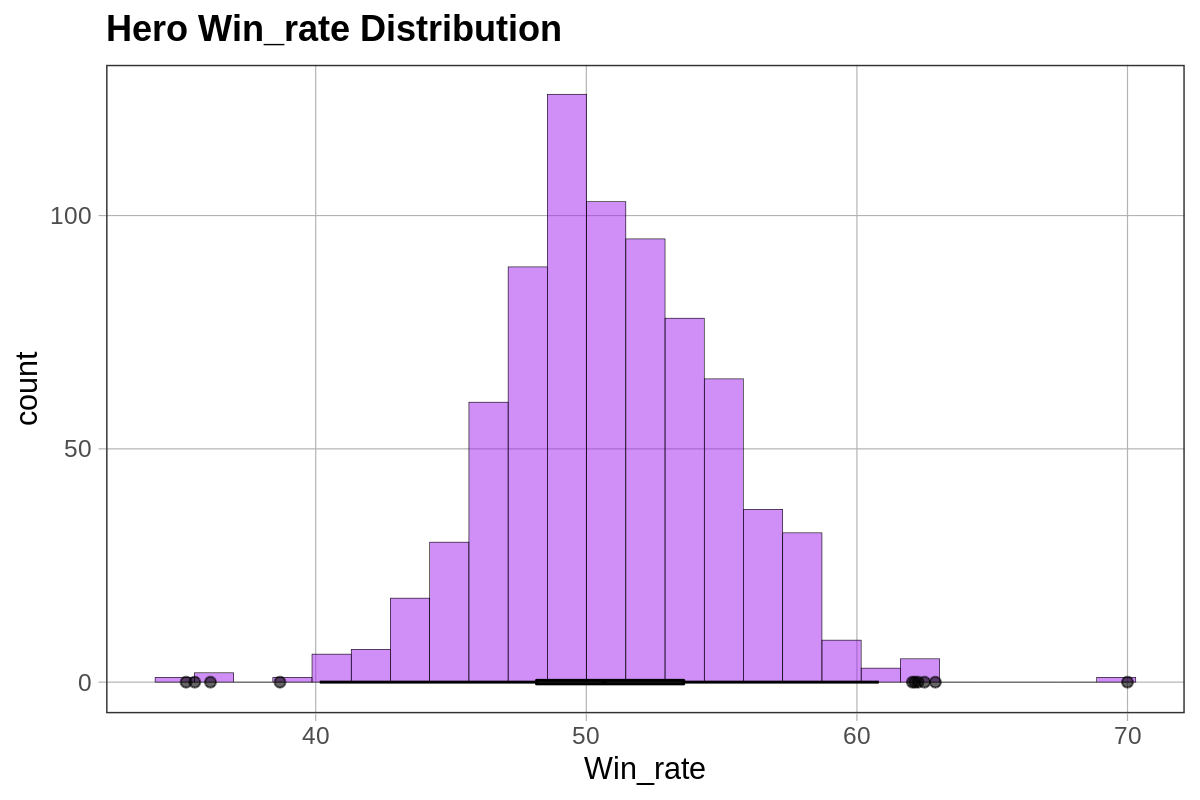

In [9]:
favstats(~Win_rate, data=Overframe)
gf_histogram(~Win_rate, data=Overframe, title="Hero Win_rate Distribution", fill="purple") %>%
gf_boxplot(~Win_rate, data=Overframe, fill="black")

We must investigate whether or not *Win_rate* is affected by other variables so as to not convolute our initial hypothesis. Here, I created 3 histograms where the *Win_rate* distribution is split by their respective platforms, PS, XBOX, and PC. As you can see, there is very little variation between the graphs as their distributions all seemingly overlap. You can't be more certain of winning on an XBOX than can be on PC. With this we can confidently say that Platform has no effect on a hero's chances of winning.

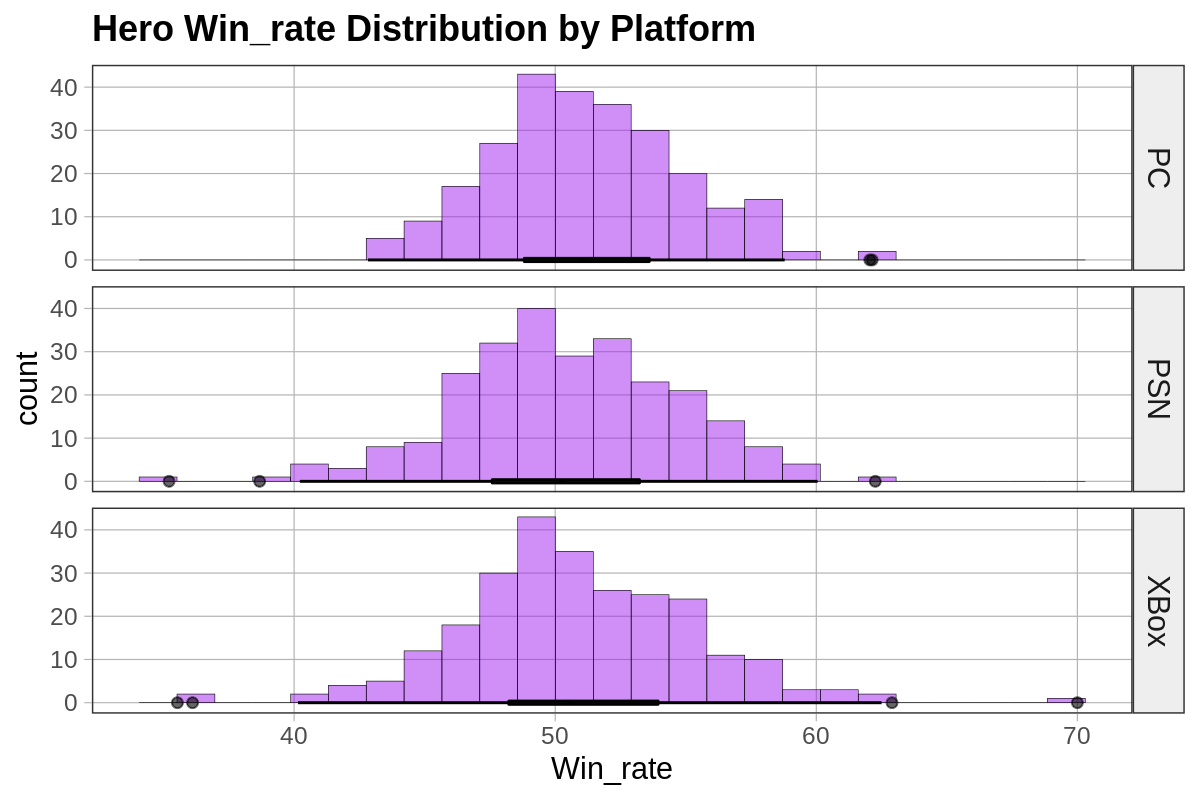

In [17]:
gf_histogram(~Win_rate, data=Overframe, title="Hero Win_rate Distribution by Platform", fill="purple") %>%
gf_facet_grid(Platform~.) %>%
gf_boxplot(~Win_rate, data=Overframe, fill="black")

Here, I've split the heroes in the *Win_rate* distribution by their respective competitive ranks. Looking at these histograms, you can see the rank distributions are more varied with slightly less overlap. You might be tempted to say that rank has an effect on *Win_rate*, but it's actually the opposite. Rank in Overwatch is determined by how many games you won. The more games won, the higher the rank. This is why the Bronze distribution has a much lower on average Win_rate than the Grandmaster one. This is an example of an inverse relationship.

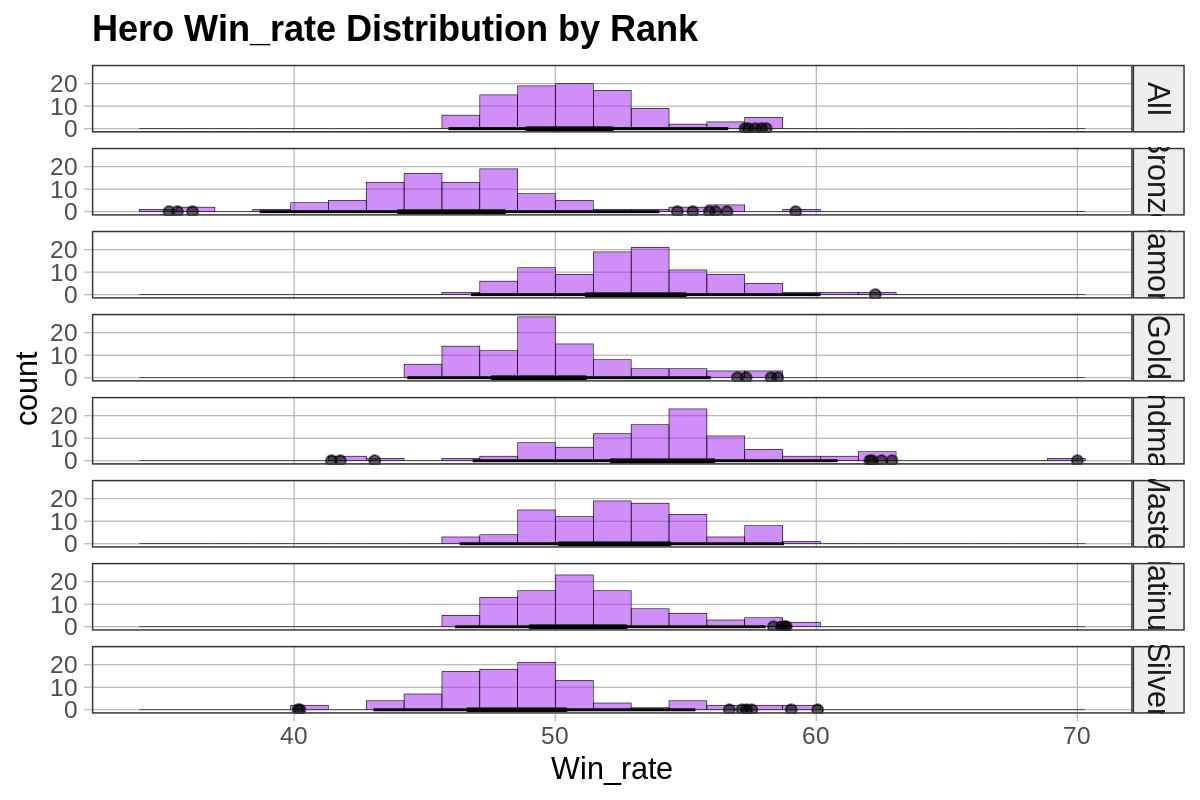

In [18]:
gf_histogram(~Win_rate, data=Overframe, title="Hero Win_rate Distribution by Rank", fill="purple") %>%
gf_facet_grid(Rank~.) %>%
gf_boxplot(~Win_rate, data=Overframe, fill="black")

Now we must look at the distribution of different heroes' *Pick_rates*. According to the histogram, all heroes in this data set have a *Pick_rate* between 0.14% and 15.23%. Half of all heroes' *Pick_rates* fall between 1.28% and 4.03%, with the average being 3.13%.

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0.14,1.2775,2.055,4.0325,15.23,3.125078,2.757791,768,0


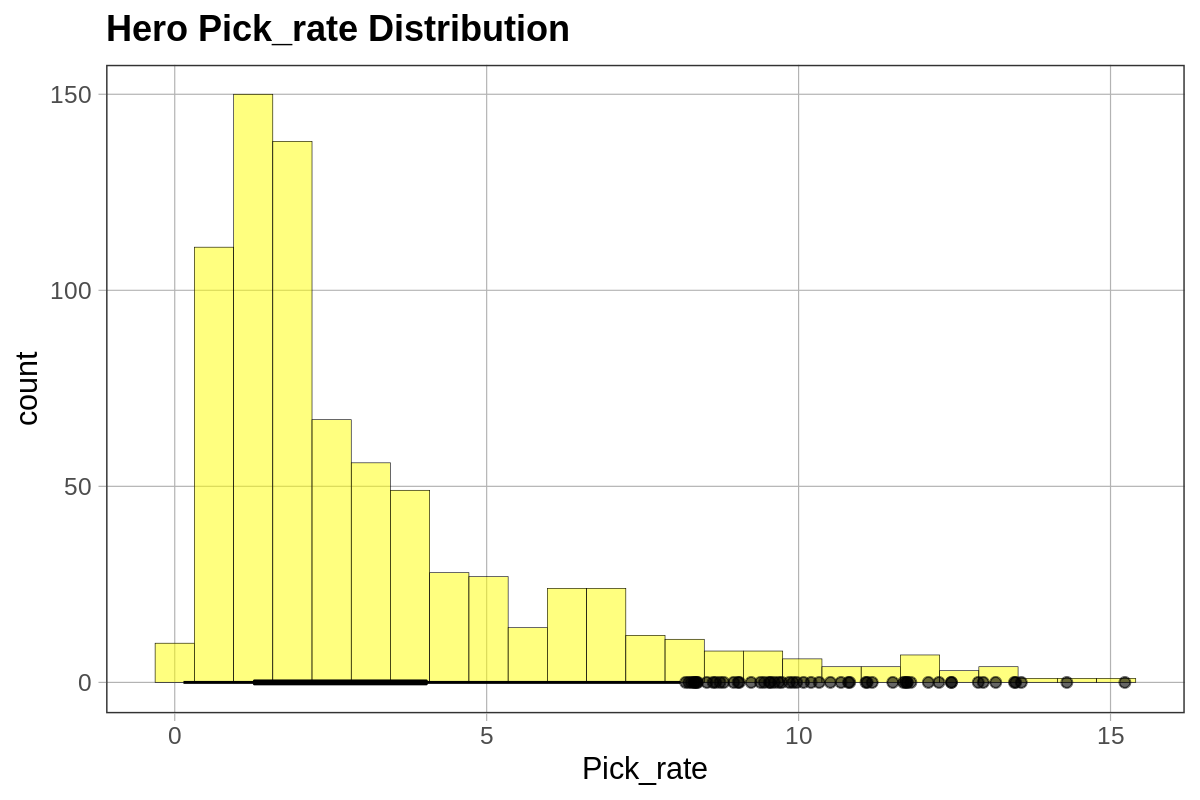

In [11]:
favstats(~Pick_rate, data=Overframe)
gf_histogram(~Pick_rate, data=Overframe, title="Hero Pick_rate Distribution", fill="yellow") %>%
gf_boxplot(~Pick_rate, data=Overframe)

Looking at the histogram above, we can see that it is heavily skewed to the right with a lot of outliers. This could have the potential to greatly throw off our analysis and the accuracy of our model. A model uses the mean of the outcome variable in order to produce accurate predictions of the data set. But a mean can only be useful when the data set is normal, i.e. the mean is the most common value.

In order to normalize the data set, and as a result produce a more accurate model, we will apply a logarithmic transformation onto our data set. This is just taking the natural logarithm of each value. This has the effect of shrinking our outliers and bringing all values closer to the mean. This data becomes much more suitable for analysis and will be the variable which we build the model from. Now instead of investigating how *Win_rate* affects *Pick_rate*, we will investigate how it affects the log of the *Pick_rate*. Our new word equation will be *logPick_rate = Win_rate + other stuff.*

Looking at this new histogram, we can see that the log of *Pick_rate*s fall between -1.96 and 2.72. Half of them fall between 0.24 and 1.39, with a mean of 0.79.

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,-1.966113,0.2448993,0.7202729,1.394386,2.723267,0.7931818,0.8495275,768,0


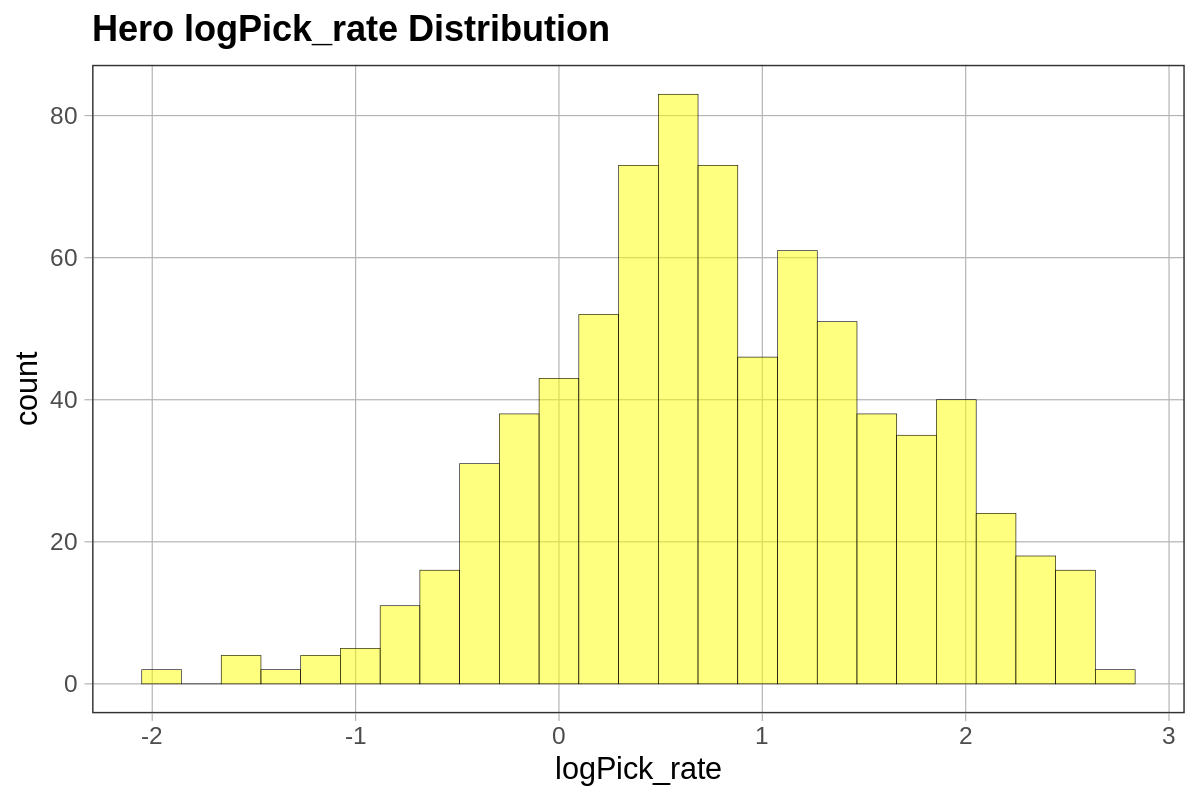

In [4]:
Overframe$logPick_rate <- log(Overframe$Pick_rate)
gf_histogram(~logPick_rate, data=Overframe, title="Hero logPick_rate Distribution", fill="yellow")
favstats(~logPick_rate, data=Overframe)

Again, we must investigate our outcome variable to be sure that it's not affected by other variables so as to not convolute our initial hypothesis. The *logPick_rate* distribution is split by Platform, and again, we can see that there is very little variation amongst the histograms, will all of them nearly perfectly overlap. There is no evidence to suggest that a hero is more likely to be picked on a certain platform than any other platform, so we can be confident that *logPick_rate* is unaffected by Platform.

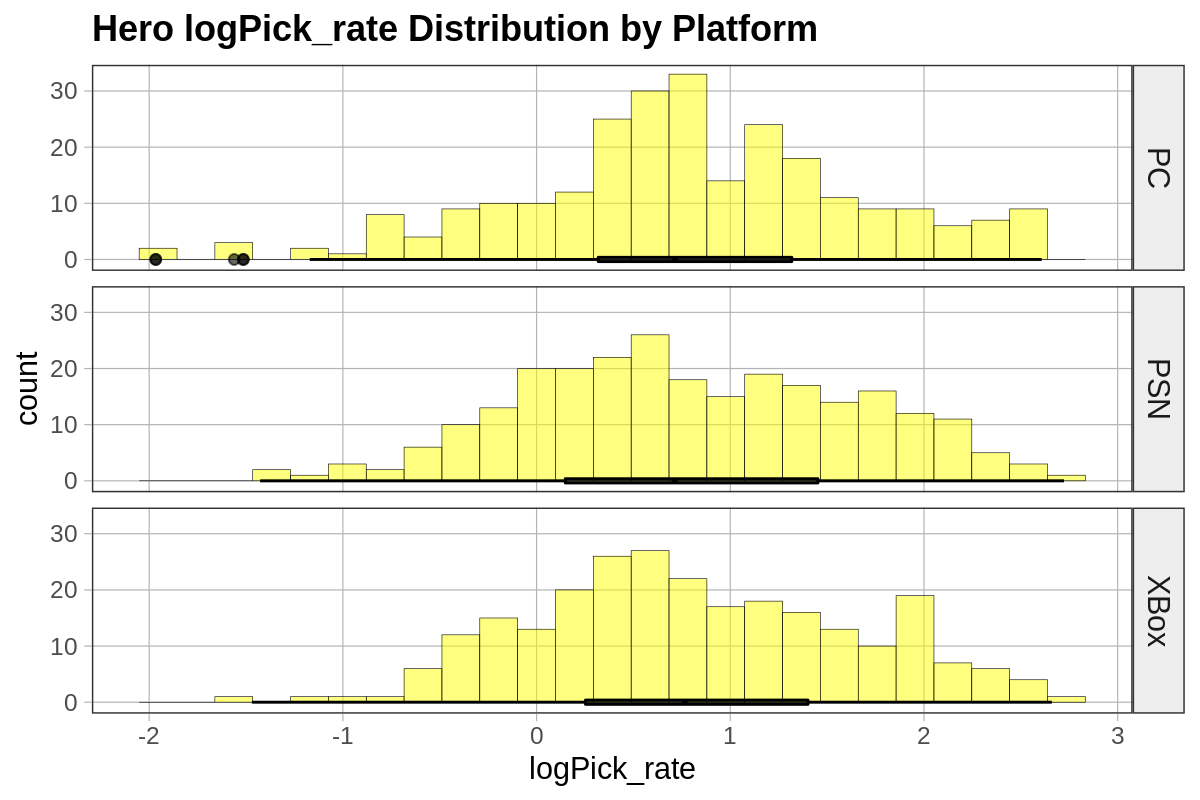

In [6]:
gf_histogram(~logPick_rate, data=Overframe, title="Hero logPick_rate Distribution by Platform", fill="yellow") %>%
gf_facet_grid(Platform~.) %>%
gf_boxplot(~logPick_rate, data=Overframe, fill="black")

Here, I have split the *logPick_rate* distribution by Rank, and again we can see that each distribution is nearly identical to every other distribution, with little to no variation. We can confidently say that rank has no effect on a hero's likelihood of being picked. 

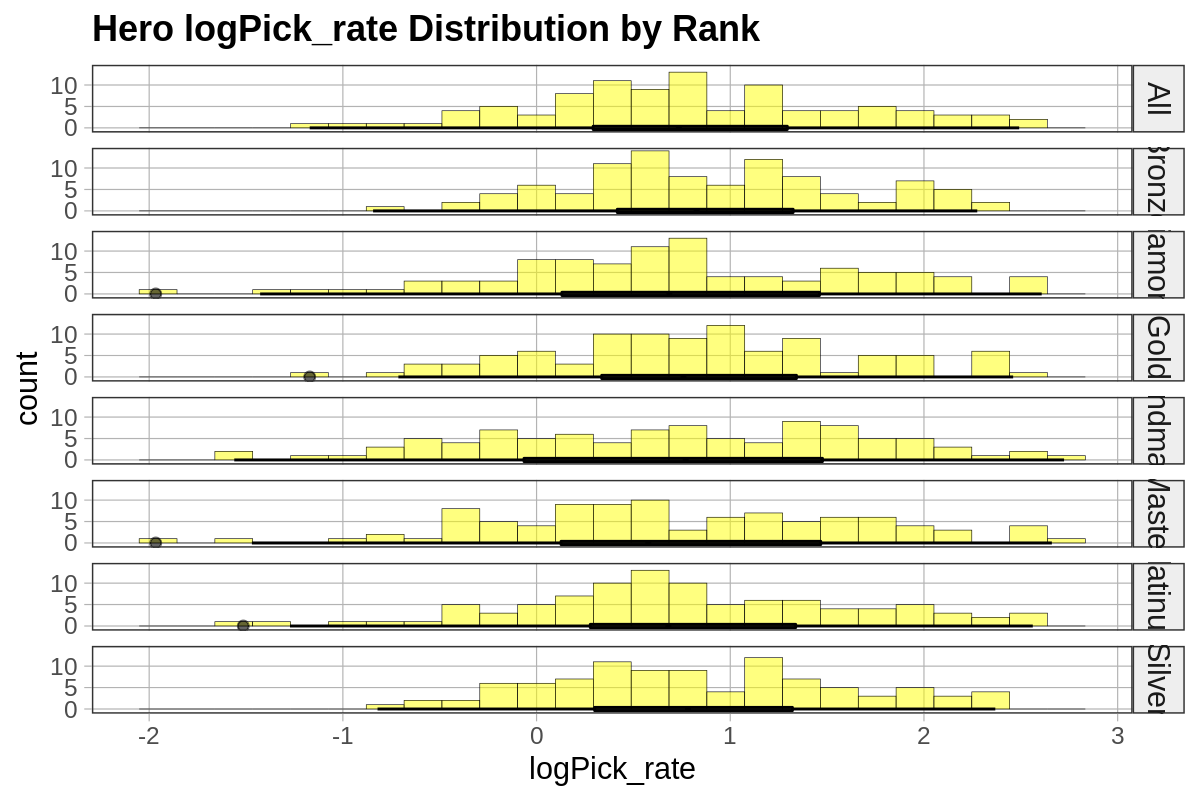

In [7]:
gf_histogram(~logPick_rate, data=Overframe, title="Hero logPick_rate Distribution by Rank", fill="yellow") %>%
gf_facet_grid(Rank~.) %>%
gf_boxplot(~logPick_rate, data=Overframe, fill="black")

# 3.0 - Model Variation

Now we are going to explore the relationship between our variables by creating a model. Below is a jitter plot with the explanatory variable, *Win_rate*, on the x-axis, and the outcome variable, *logPick_rate*, on the y-axis. Each point is a hero in the data set whose location corresponds to their given *Win_rate* and *logPick_rate*. The blue represents the model.


Call:
lm(formula = logPick_rate ~ Win_rate, data = Overframe)

Coefficients:
(Intercept)     Win_rate  
   1.286867    -0.009707  


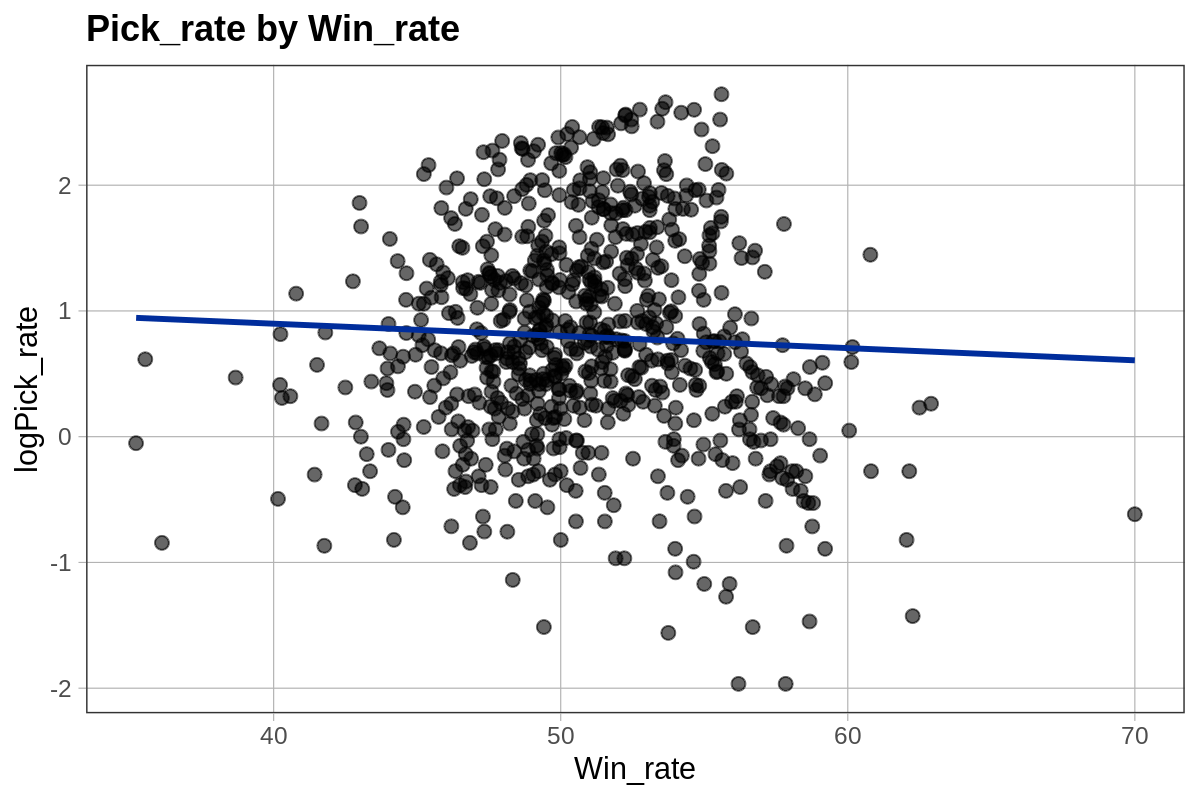

In [11]:
Win_model <- lm(logPick_rate~Win_rate, data=Overframe)
Empty_model <-lm(logPick_rate~NULL, data=Overframe)


gf_jitter(logPick_rate~Win_rate, data=Overframe, title="Pick_rate by Win_rate") %>%
gf_lm()
Win_model

The GLM equation for this linear model is *Yi = 1.286867 - 0.009707xi + ei*, where 1.286867 is the expected *Pick_rate* when a hero's *Win_rate* is 0.00%, 0.009707 is the decrement subtracted from a hero's *logPick_rate* as their *Win_rate* goes up by 1, and *ei* is the difference between the model and the data point's actual location

In [12]:
anova(Win_model)
supernova(Win_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Win_rate,1,1.240619,1.2406193,1.720646,0.1900029
Residuals,766,552.300960,0.7210195,NA,NA


 Analysis of Variance Table (Type III SS)
 Model: logPick_rate ~ Win_rate

                              SS  df    MS     F    PRE     p
 ----- --------------- | ------- --- ----- ----- ------ -----
 Model (error reduced) |   1.241   1 1.241 1.721 0.0022 .1900
 Error (from model)    | 552.301 766 0.721                   
 ----- --------------- | ------- --- ----- ----- ------ -----
 Total (empty model)   | 553.542 767 0.722                   

Looking at the results of the ANOVA and supernova, we see that the model has a PRE of 0.22% and a F ratio of 1.721. The PRE is the amount of total error that was reduced by the model. It's a measure of now close our model was to the DGP. Only 0.22% of the error was reduced by the linear model, meaning that it didn't do a very good explaining variance.
The F ratio is the ratio between the error explained by the model and the error unexplained by the model. Here, the error explained by the model is about 1.721 times as big as the error unexplained by the model. As far as models go, this is a very low F ratio making it an indicator of its poor performance as a model.

# 4.0 - Evaluate Model

We must evaluate our model by making sure that our parameters could not have been generated randomly. This ensures that there is a definite link between between our variables that could not be easily replicated given that our data was shuffled. To put it in simpler terms, How different is our model from the mean? To do this, I created 1000 data sets where each hero's *Win_rate* is randomly assigned, generated a GLM for each set, recorded each *b1* parameter and placed it in the histogram below.

Warning message:
“geom_vline(): Ignoring `mapping` because `xintercept` was provided.”


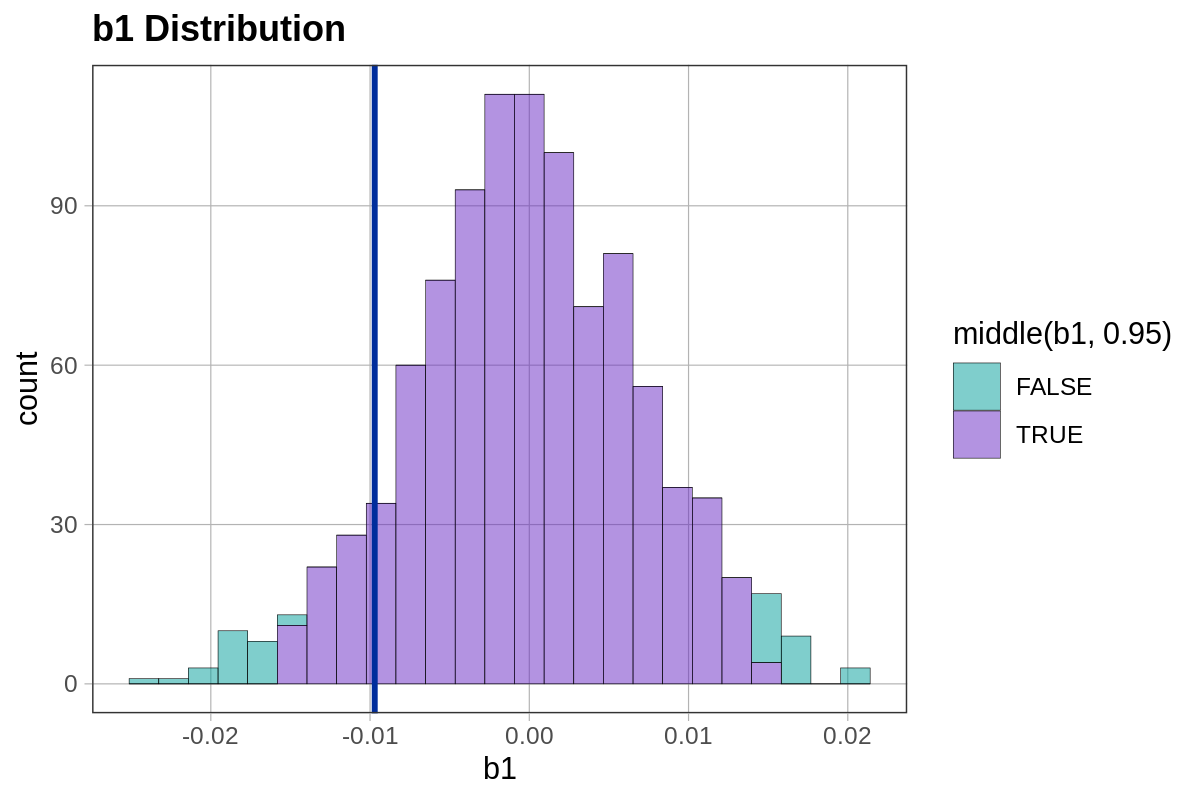

In [16]:
sdob1 <- do(1000)*b1(logPick_rate~shuffle(Win_rate), data=Overframe)
gf_histogram(~b1, data=sdob1,fill = ~middle(b1, 0.95), title="b1 Distribution") %>%
gf_vline(xintercept=b1(Win_model))

The x-intercept on the graph shows us the *b1* of the linear model from our original, unshuffled data set. The distribution is split into 2 categories, TRUE in FALSE. TRUE represent the middle 95% of all 1000 *b1*'s that were randomly generated. FALSE represents the rest of the outer 5% of *b1*'s generated. This is where a *b1* is considered highly unlikely to be generated randomly, and if our original *b1* falls in this range, then we can be highly confident that our original GLM was not the result of random sampling. As you can see, our original *b1* is pretty far from the mean, but not far enough to be in the outer range. Our model has a p-value of 0.19, meaning that 19.0% of all *b1*'s generated are further from the mean than our original *b1*. Our original *b1* is not unique enough to not be the result of random sampling. Thus, we can conclude that the *Win_rate* of a hero has no substantial effect on its *logPick_rate.*

# 5.0 - Conclusion

In this report, I used a data set which included the most popular heroes across all ranks and platforms from every competitive game played in Overwatch since May 24, 2016. The data set included 768 heroes, along with their respective *Pick_rate*, average proportion of players on a game, and *Win_rate*, average chance of winning a competitive match. I tried to explore whether there is a relationship between *Win_rate* and *Pick_rate*. To be more exact, I wanted to find out whether or not a hero’s chances of winning affects its chances of being picked. I hypothesized that players are more likely to pick heroes that have a higher chance of winning games, and so there is a relationship between the two variables.

I created a histogram for both *Win_rate* and *Pick_rate*. Although *Win_rate* followed a normal distribution with heros having a *Win_rate* of 50.85%, the *Pick_rates* of heroes was skewed and had to be transformed so that it can be normalized so that analysis can be more accurate. I took the log of the *Pick_rate* and found that the average for all heroes was 0.79. I then created a jitter plot for this new relationship and generated a model. The equation for it is *Yi = 1.286867 - 0.009707xi + ei*.
 
When I tried to explore how effective the model was at explaining variation, it generated a PRE of 0.22% and a F ratio of 1.721. This means that 0.22% of the total error was explained by the linear model, and the error explained by the model is 1.721 times larger than the error left unexplained by the model. Judging by this, we can conclude that the linear model does a very poor job at explaining our DGP.

Next I explored whether or not our model was unique and could not be easily generated randomly. To do this I shuffled the *Win_rate* of every hero and generated a model for each random shuffle. I then collected the *b1’s* of each of the models and put them in a histogram. When looking at the histogram, we can see that the original *b1* is considerably far from the the middle of the distribution, which is the mean. But it was not far away enough where the possibility of random sampling could not be ruled out. It has a p-value of 0.19, meaning that 19.0% of the *b1’s* generated were further away from the mean than our original *b1*. Our *b1* is close enough to the mean that we would have about just as good of an estimate of a hero’s *logPick_rate* using the mean value than we would using our linear model. 

This has lead me to the conclusion that a hero’s *logPick_rate* is largely unaffected by its *Win_rate*. Subsequently, a hero is not more likely to be picked based on it's chances of winning. Players are not more likely to choose characters that have a higher likelihood of winning a game. I guess a player’s choice of a hero is not impacted by their determination to win, but rather other factors such as enjoyment of a hero’s playstyle or how knowledgeable of the hero's skillset a player is, factors which I have failed to consider.